#**Challenge 4:**

Create a dataset of 1000 celebrities with 10 images for each one. Labels should be their id in your dataset. Then visualize their birthplace on a 3d world map with a point (with distinct longitude, latitude, and altitude) per 1000 square kilometres.
<br>
<br>
The speed of creation of the dataset will affect your grade (You should calculate it with 'time' library) and in visualization, speed is not important as it is a graphical rendering.
<br><br>
You can use any tool that you want to reach your goal. Also The score of each step will be calculated separately from the other steps. So even if you fail to do one of the steps, do the other steps on the hypothetical parameters.
<br><br><br>

If you have any questions please contact me via [this link](http://smalek.22web.org/co/).
<br><br>
**Good luck my dear students**

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

     |████████████████████████████████| 911kB 2.8MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
names=[]
images=[]
import time

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)
for n in range(1,11):
  wd.get('https://www.imdb.com/list/ls058011111/?sort=list_order,asc&mode=detail&page='+str(n))
  celebrities=wd.find_elements_by_class_name('lister-item mode-detail')
  for i in range(1,101):
    #name=wd.find_element_by_xpath('//*[@id="main"]/div/div[2]/div[3]/div['+str(i)+']/div[2]/h3/a')
    name=wd.find_element_by_css_selector('#main > div > div.lister.list.detail.sub-list > div.lister-list > div:nth-child('+str(i)+') > div.lister-item-content > h3 > a')
    name=name.text
    names.append(name)
for name in names:
  images_of_one_person=[]
  prepr_name=''
  for letter in name:
    if letter==' ' or letter=='-':
      prepr_name=prepr_name+'+'
    else:
      prepr_name=prepr_name+letter
  wd.get('https://www.picsearch.com/index.cgi?q='+str(prepr_name))
  for i in range(1,11):
    try:
      image=WebDriverWait(wd,10).until(EC.presence_of_element_located((By.XPATH,'/html/body/div[2]/div[2]/div[3]/span['+str(i)+']/a/img')))
    except:
      print(name)
      break
    image=image.get_attribute("src")
    images_of_one_person.append(image)
  images.append(images_of_one_person)
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

21:03:45
21:24:17


In [ ]:
len(names)

1000

In [ ]:
set1=set(names)
names1=list(set1)
len(names1)

#making sure that names are unique

1000

In [ ]:
len(images)

1000

In [ ]:
len(images[0])

10

In [ ]:
for i in range(len(images)):
  if len(images[i])==0:
    images[i]=['NaN']*10

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import urllib
url=images[0][2]
im = Image.open(urllib.request.urlopen(url))

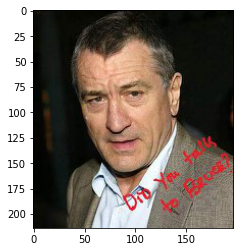

In [ ]:
plt.imshow(im)

In [ ]:
def show_the_images_of_celebrity(number_of_celebrity):
  for n in range(10):
    url=images[number_of_celebrity][n]
    im=Image.open(urllib.request.urlopen(url))
    plt.imshow(im)
    plt.show()

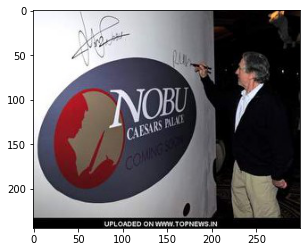

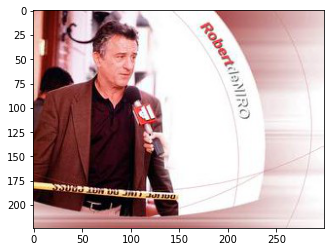

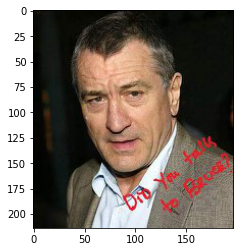

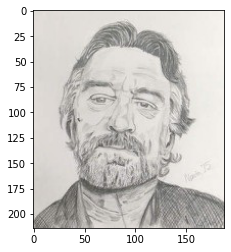

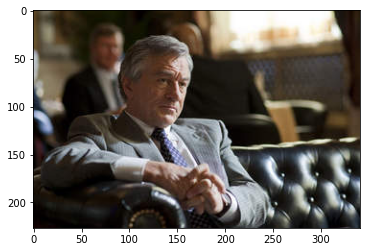

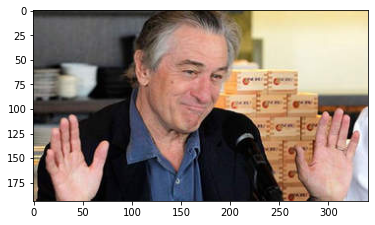

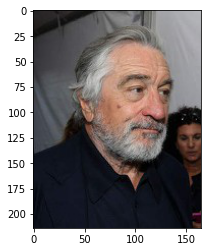

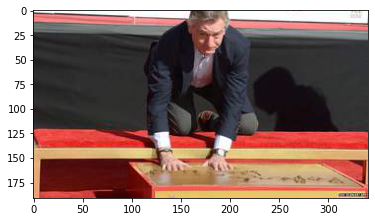

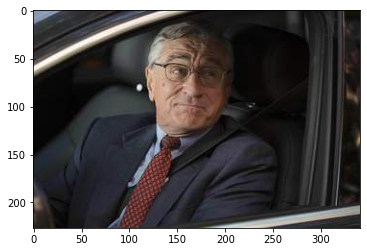

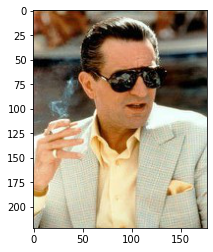

In [ ]:
show_the_images_of_celebrity(0)

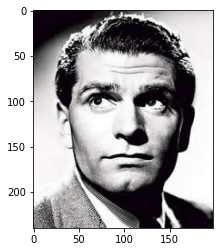

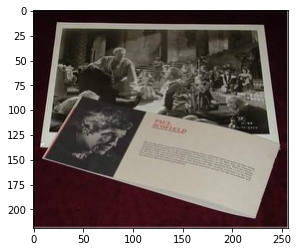

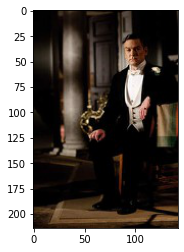

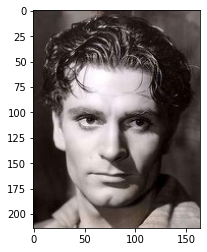

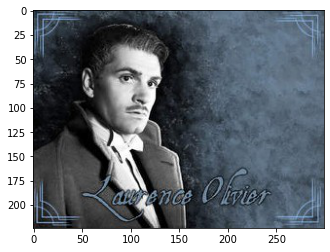

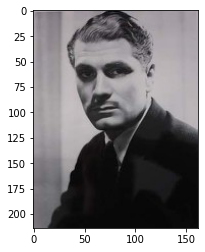

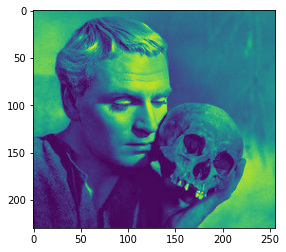

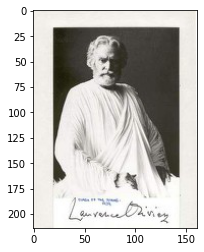

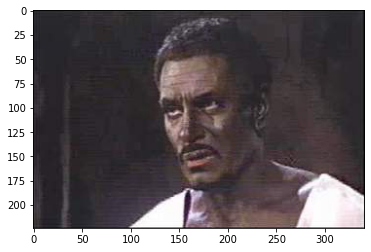

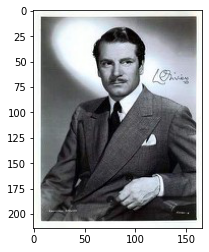

In [ ]:
show_the_images_of_celebrity(26)

In [ ]:
import pandas as pd
data={'name':names,'image_1':[i[0] for i in images],'image_2':[i[1] for i in images],'image_3':[i[2] for i in images],'image_4':[i[3] for i in images],'image_5':[i[4] for i in images],'image_6':[i[5] for i in images],'image_7':[i[6] for i in images],'image_8':[i[7] for i in images],'image_9':[i[8] for i in images],'image_10':[i[9] for i in images]}
celebrities_dataset=pd.DataFrame(data=data)

In [ ]:
celebrities_dataset.head()

,name,image_1,image_2,image_3,image_4,image_5,image_6,image_7,image_8,image_9,image_10
0,Robert De Niro,https://media4.picsearch.com/is?vGOdkuX6llM2sz...,https://media2.picsearch.com/is?uoZz1tl5zQexpp...,https://media2.picsearch.com/is?l5nhUAz2gNmWic...,https://media3.picsearch.com/is?MXUj7e1FCTYg0P...,https://media1.picsearch.com/is?uYnjqTBbKAurPP...,https://media2.picsearch.com/is?Mgxm_okr7hgqfN...,https://media5.picsearch.com/is?hG5cnTHq4HmqIE...,https://media3.picsearch.com/is?LGeR0c4rhjKm7E...,https://media4.picsearch.com/is?5C6ct7dj6nBqaf...,https://media5.picsearch.com/is?KAl4qPaTSyBylq...
1,Jack Nicholson,https://media3.picsearch.com/is?oVDgh1YfsyhsUt...,https://media1.picsearch.com/is?h65mIS-eNZt70V...,https://media1.picsearch.com/is?_7XNC9-OkZYtgG...,https://media3.picsearch.com/is?Jy2TnGQBmzmbQe...,https://media2.picsearch.com/is?JgkbHzSWIEA_7B...,https://media1.picsearch.com/is?KJrkQSDpx15ujN...,https://media3.picsearch.com/is?blB1e5JqVC98Pt...,https://media1.picsearch.com/is?17ixvo2ZSOCvCk...,https://media4.picsearch.com/is?X-V6L6K9KpM7CR...,https://media3.picsearch.com/is?f-bN12KSg73-xX...
2,Marlon Brando,https://media4.picsearch.com/is?L2TgrknLzIMmWU...,https://media2.picsearch.com/is?cmdwDq2a-DyZJj...,https://media5.picsearch.com/is?sYaUyALGsOkAnE...,https://media4.picsearch.com/is?vZyTdYohorOtPV...,https://media3.picsearch.com/is?8JGJwb4Dna1U-H...,https://media2.picsearch.com/is?VYu5_a10IMvXl4...,https://media1.picsearch.com/is?qPNs-qoGvbMUPL...,https://media5.picsearch.com/is?8cP9xs9B_xMXMR...,https://media5.picsearch.com/is?m2TSbEqB3EVJ44...,https://media1.picsearch.com/is?-BCvWzLNVdrJ1p...
3,Denzel Washington,https://media4.picsearch.com/is?9uUzCt-D19Hgje...,https://media2.picsearch.com/is?BlTZeoCZxS8dFo...,https://media1.picsearch.com/is?exIu2apTdVAK-T...,https://media4.picsearch.com/is?qwQM525XWPpsBt...,https://media5.picsearch.com/is?ApvOjCGFgJ4Pq1...,https://media4.picsearch.com/is?tU_0d6jHFTxNOO...,https://media2.picsearch.com/is?Jj-WQX3VqGEorS...,https://media2.picsearch.com/is?AjHIalDyX_lohl...,https://media1.picsearch.com/is?gyUIAbIMlmamFQ...,https://media4.picsearch.com/is?djVtPTqORLyhyd...
4,Katharine Hepburn,https://media3.picsearch.com/is?LrNVFf3ZNB4WR_...,https://media1.picsearch.com/is?WGlMqPdmuRZCX1...,https://media2.picsearch.com/is?w9ipNlTib6wFC1...,https://media3.picsearch.com/is?UBEMkLRlgodK4i...,https://media5.picsearch.com/is?6-COavrd02a0Fv...,https://media4.picsearch.com/is?NSQVHm8byl6t0-...,https://media3.picsearch.com/is?IOuz9PBfTQbMT2...,https://media2.picsearch.com/is?easo7fIojZiLEr...,https://media1.picsearch.com/is?g-I3_oUFiFJ3SK...,https://media3.picsearch.com/is?KLhsbA7mEaCg1i...


In [ ]:
celebrities_dataset['labels']=celebrities_dataset.index.values

In [ ]:
print(celebrities_dataset[:5])

                name  ... labels
0     Robert De Niro  ...      0
1     Jack Nicholson  ...      1
2      Marlon Brando  ...      2
3  Denzel Washington  ...      3
4  Katharine Hepburn  ...      4

[5 rows x 12 columns]


In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


In [ ]:
birthplaces=[]
longitudes=[]
latitudes=[]
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)
for name in celebrities_dataset['name']:
  preprocessed_name=''
  for letter in name:
    if letter==' ':
      preprocessed_name=preprocessed_name+'-'
    else:
      preprocessed_name=preprocessed_name+letter.lower()
  wd.get('https://www.famousbirthdays.com/people/'+str(preprocessed_name)+'.html')
  try:
    birthplace=WebDriverWait(wd,5).until(EC.presence_of_element_located((By.CSS_SELECTOR,'body > div.page-wrapper > div.main-section > div.container > div > div.col-sm-7.col-md-8 > div > div > div:nth-child(2) > div > div.row.main-stats > div > div:nth-child(2) > div > a:nth-child(3)')))
    birthplace=birthplace.text
  except:
    birthplace='NaN'
  birthplaces.append(birthplace)
  if birthplace=='NaN':
    longitudes.append('NaN')
    latitudes.append('NaN')
  else:
      wd.get('https://www.distancesfrom.com/Latitude-Longitude.aspx')
      elem=wd.find_element_by_css_selector('#Source')
      elem.send_keys(str(birthplace))
      #button=wd.find_element_by_css_selector('#Button1')
      button=WebDriverWait(wd,5).until(EC.element_to_be_clickable((By.CSS_SELECTOR,"#Button1")))
      webdriver.ActionChains(wd).move_to_element(button ).click(button ).perform()
      #button.click()
      try:
        latitude=WebDriverWait(wd,5).until(EC.presence_of_element_located((By.CSS_SELECTOR,'#MC_GMD_lblLatitude')))
      except:
        longitudes.append('NaN')
        latitudes.append('NaN')
        continue
      latitude=latitude.text
      longitude=wd.find_element_by_css_selector('#MC_GMD_lblLongitude').text
      longitudes.append(longitude)
      latitudes.append(latitude)
      elem=wd.find_element_by_css_selector('#Source')
      elem.clear()
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

21:33:37
23:30:19


In [ ]:
celebrities_dataset['birthplace']=birthplaces
celebrities_dataset['longitudes']=longitudes
celebrities_dataset['latitudes']=latitudes

In [ ]:
celebrities_dataset.to_csv('celebrities_dataset.csv')

In [ ]:
celebrities_with_birthplaces=celebrities_dataset[celebrities_dataset['birthplace']!='NaN']
celebrities_with_birthplaces=celebrities_dataset[celebrities_dataset['longitudes']!='NaN']

/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [ ]:
celebrities_dataset.shape

(1000, 16)

In [ ]:
celebrities_with_birthplaces.shape

(1000, 16)

In [ ]:
celebrities_with_birthplaces['longitudes']=pd.to_numeric(celebrities_with_birthplaces['longitudes'])
celebrities_with_birthplaces['latitudes']=pd.to_numeric(celebrities_with_birthplaces['latitudes'])

In [ ]:
celebrities_with_birthplaces=celebrities_with_birthplaces.dropna()

In [ ]:
celebrities_with_birthplaces.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 866 entries, 0 to 999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  866 non-null    int64  
 1   name        866 non-null    object 
 2   image_1     866 non-null    object 
 3   image_2     866 non-null    object 
 4   image_3     866 non-null    object 
 5   image_4     866 non-null    object 
 6   image_5     866 non-null    object 
 7   image_6     866 non-null    object 
 8   image_7     866 non-null    object 
 9   image_8     866 non-null    object 
 10  image_9     866 non-null    object 
 11  image_10    866 non-null    object 
 12  labels      866 non-null    int64  
 13  birthplace  866 non-null    object 
 14  longitudes  866 non-null    float64
 15  latitudes   866 non-null    float64
dtypes: float64(2), int64(2), object(12)
memory usage: 115.0+ KB


In [ ]:
import plotly.express as px

fig = px.scatter_mapbox(celebrities_with_birthplaces, lat="latitudes", lon="longitudes", hover_name="name",hover_data=['birthplace'],
                        color_discrete_sequence=["lime"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

21:02:13
